End To End Random Forest Implementation with Parameter Tuning \
for more info please check the links below \
[Link 1](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/) \
[Link 2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, \
  confusion_matrix, ConfusionMatrixDisplay, classification_report

## Load the data

In [ ]:
fileLocation = "/content/drive/MyDrive/end2end_DS/DS_projects/risk_assessment/heart_2020_cleaned.csv"
data         = pd.read_csv(fileLocation)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
print("number of rows: {}\nnumber of cols: {}".format(data.shape[0], data.shape[1]))

number of rows: 319795
number of cols: 18


In [ ]:
# some cleaning and splitting
replaceMap = {
    '18-24': 'Youth',
    '25-29': 'Adult',
    '30-34': 'Adult',
    '35-39': 'Adult',
    '40-44': 'Adult',
    '45-49': 'Adult',
    '50-54': 'Adult',
    '55-59': 'Adult',
    '60-64': 'Adult',
    '65-69': 'Senior',
    '70-74': 'Senior',
    '75-79': 'Senior',
    '80_or_older': 'Senior'
}
data['AgeCategory']= data['AgeCategory'].map(replaceMap)

# let's split our datasets
#split data into dependent variables(X) and independent variable(y) that we would predict
y = data.pop("HeartDisease").map({'Yes': 1, 'No': 0})
X = data
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, train_size=0.7)
#get shape of train and test data
print("train size X : ", X_train.shape)
print("train size y : ", y_train.shape)
print("test size  X : ", X_test.shape)
print("test size  y : ", y_test.shape)

train size X :  (223856, 17)
train size y :  (223856,)
test size  X :  (95939, 17)
test size  y :  (95939,)


## creating baseline model

In [ ]:
# preprocessing training and test data
X_train_processed = pd.get_dummies(X_train, drop_first= True)
X_test_processed  = pd.get_dummies(X_test, drop_first= True)

clf = RandomForestClassifier()
clf.fit(X_train_processed, y_train)


RandomForestClassifier()

In [ ]:
# evaluate the model
def model_eval(y, y_hat):
  # print('Accuracy: ', accuracy_score(y, y_hat))
  # print('Precission[FP]: ', precision_score(y, y_hat))
  # print('Recall[FN]:', recall_score(y, y_hat))
  # print("F1 Score: " , f1_score(y, y_hat))
  print(classification_report(y, y_hat))
  tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()
  print("TN:{}\nFP:{}\nFN:{}\nTP:{}".format(tn, fp, fn, tp))


In [ ]:
print("training report")
model_eval(y_train, clf.predict(X_train_processed))

training report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    204773
           1       0.99      0.93      0.96     19083

    accuracy                           0.99    223856
   macro avg       0.99      0.97      0.98    223856
weighted avg       0.99      0.99      0.99    223856

TN:204620
FP:153
FN:1315
TP:17768


## baseline test report

In [ ]:
print("test report")
model_eval(y_test, clf.predict(X_test_processed))

test report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     87649
           1       0.33      0.13      0.19      8290

    accuracy                           0.90     95939
   macro avg       0.63      0.55      0.57     95939
weighted avg       0.87      0.90      0.88     95939

TN:85437
FP:2212
FN:7188
TP:1102


In [ ]:
# parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Parameter tuning

In [ ]:
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [ ]:
# performing randomGrid search

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs=-1, verbose= 1, warm_start= True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = 5, verbose= 1000, random_state=42)
# Fit the random search model
X_train = pd.get_dummies(X_train, drop_first= True)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   17.0s
[Parallel(n_jobs=2)]: Done 20

[CV 1/5; 1/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.909 total time= 8.4min
[CV 2/5; 1/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   11.7s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   16.8s
[Parallel(n_jobs=2)]: Done 20

[CV 2/5; 1/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.907 total time= 8.1min
[CV 3/5; 1/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   10.9s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   15.8s
[Parallel(n_jobs=2)]: Done 20

[CV 3/5; 1/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.908 total time= 8.0min
[CV 4/5; 1/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 20

[CV 4/5; 1/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.908 total time= 8.0min
[CV 5/5; 1/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  7.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   11.1s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done 20

[CV 5/5; 1/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.909 total time= 7.9min
[CV 1/5; 2/10] START bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 2/10] END bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000;, score=nan total time=   0.6s
[CV 2/5; 2/10] START bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 2/10] END bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000;, score=nan total time=   1.6s
[CV 3/5; 2/10] START bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 2/10] END bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000;, score=nan total time=   1.5s
[CV 4/5; 2/10] START bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 2/10] END bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000;, score=nan total time=   1.5s
[CV 5/5; 2/10] START bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 2/10] END bootstrap=False, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.99, n_estimators=1000;, score=nan total time=   1.5s
[CV 1/5; 3/10] START bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   34.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks     

[CV 1/5; 3/10] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.862 total time=  36.9s
[CV 2/5; 3/10] START bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks     

[CV 2/5; 3/10] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.858 total time=  35.2s
[CV 3/5; 3/10] START bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the

[CV 3/5; 3/10] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.856 total time=  35.4s
[CV 4/5; 3/10] START bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the

[CV 4/5; 3/10] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.860 total time=  35.1s
[CV 5/5; 3/10] START bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.5s finished


[CV 5/5; 3/10] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.862 total time=  35.0s
[CV 1/5; 4/10] START bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 20

[CV 1/5; 4/10] END bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.915 total time= 6.2min
[CV 2/5; 4/10] START bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done 20

[CV 2/5; 4/10] END bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.914 total time= 6.2min
[CV 3/5; 4/10] START bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   14.2s
[Parallel(n_jobs=2)]: Done 20

[CV 3/5; 4/10] END bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.914 total time= 6.1min
[CV 4/5; 4/10] START bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    9.5s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   13.8s
[Parallel(n_jobs=2)]: Done 20

[CV 4/5; 4/10] END bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.914 total time= 6.2min
[CV 5/5; 4/10] START bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done 20

[CV 5/5; 4/10] END bootstrap=True, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=2000;, score=0.915 total time= 6.3min
[CV 1/5; 5/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 5/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.916 total time=  37.3s
[CV 2/5; 5/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   34.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 5/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.915 total time=  36.8s
[CV 3/5; 5/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.7s finished


[CV 3/5; 5/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.915 total time=  38.0s
[CV 4/5; 5/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished


[CV 4/5; 5/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.915 total time=  38.2s
[CV 5/5; 5/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.5s finished


[CV 5/5; 5/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200;, score=0.916 total time=  37.1s
[CV 1/5; 6/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 6/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200;, score=nan total time=   0.2s
[CV 2/5; 6/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 6/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200;, score=nan total time=   1.2s
[CV 3/5; 6/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 6/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200;, score=nan total time=   1.2s
[CV 4/5; 6/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 6/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200;, score=nan total time=   1.2s
[CV 5/5; 6/10] START bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 6/10] END bootstrap=True, class_weight=None, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=200;, score=nan total time=   1.2s
[CV 1/5; 7/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    8.9s finished


[CV 1/5; 7/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000;, score=0.913 total time= 4.1min
[CV 2/5; 7/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    9.3s finished


[CV 2/5; 7/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000;, score=0.911 total time= 4.2min
[CV 3/5; 7/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    9.5s finished


[CV 3/5; 7/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000;, score=0.910 total time= 4.2min
[CV 4/5; 7/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    9.2s finished


[CV 4/5; 7/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000;, score=0.911 total time= 4.2min
[CV 5/5; 7/10] START bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    9.0s finished


[CV 5/5; 7/10] END bootstrap=False, class_weight=None, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=1000;, score=0.912 total time= 4.2min
[CV 1/5; 8/10] START bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 8/10] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600;, score=nan total time=   0.9s
[CV 2/5; 8/10] START bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 8/10] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600;, score=nan total time=   1.8s
[CV 3/5; 8/10] START bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 8/10] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600;, score=nan total time=   1.9s
[CV 4/5; 8/10] START bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 8/10] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600;, score=nan total time=   1.8s
[CV 5/5; 8/10] START bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 8/10] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=1600;, score=nan total time=   1.8s
[CV 1/5; 9/10] START bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 9/10] END bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000;, score=nan total time=   2.1s
[CV 2/5; 9/10] START bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 9/10] END bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000;, score=nan total time=   2.0s
[CV 3/5; 9/10] START bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 9/10] END bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000;, score=nan total time=   2.0s
[CV 4/5; 9/10] START bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 9/10] END bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000;, score=nan total time=   2.0s
[CV 5/5; 9/10] START bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 9/10] END bootstrap=False, class_weight=balanced, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.99, n_estimators=2000;, score=nan total time=   2.0s
[CV 1/5; 10/10] START bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 1/5; 10/10] END bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800;, score=nan total time=   1.5s
[CV 2/5; 10/10] START bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 2/5; 10/10] END bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800;, score=nan total time=   1.5s
[CV 3/5; 10/10] START bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 3/5; 10/10] END bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800;, score=nan total time=   1.6s
[CV 4/5; 10/10] START bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 4/5; 10/10] END bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800;, score=nan total time=   1.5s
[CV 5/5; 10/10] START bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[CV 5/5; 10/10] END bootstrap=True, class_weight=balanced, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.99, n_estimators=800;, score=nan total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 436, in _process_worker
    r = call_item()
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/usr/local/lib/python3.7/dist-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*a

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, verbose=1,
                                                    warm_start=True),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None],
                                        'max_depth': [10, 60, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.99],
                                        'n_estimators': [200, 800, 1000, 1600,
                                                         2000]},
                   random_state=42, verbose=1000)

In [ ]:
print("Best F1 score: ", rf_random.best_score_)
print("Best hyperparameters: ", rf_random.best_params_)

Best F1 score:  0.9152803552033836
Best hyperparameters:  {'n_estimators': 200, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'class_weight': None, 'bootstrap': True}


In [ ]:
# running these parameters 
clf = RandomForestClassifier(n_estimators= 200, min_weight_fraction_leaf= 0.0, min_samples_split= 10, \
                             min_samples_leaf= 2, max_features= 'auto', max_depth= 60, class_weight= None, bootstrap= True)



In [ ]:
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [ ]:
X_test = pd.get_dummies(X_test, drop_first= True)
y_pred = clf.predict(X_test)

In [ ]:
print("train report")
model_eval(y_train, clf.predict(X_train))

train report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    204773
           1       0.94      0.21      0.34     19083

    accuracy                           0.93    223856
   macro avg       0.94      0.60      0.65    223856
weighted avg       0.93      0.93      0.91    223856

TN:204541
FP:232
FN:15158
TP:3925


baseTrainReport\
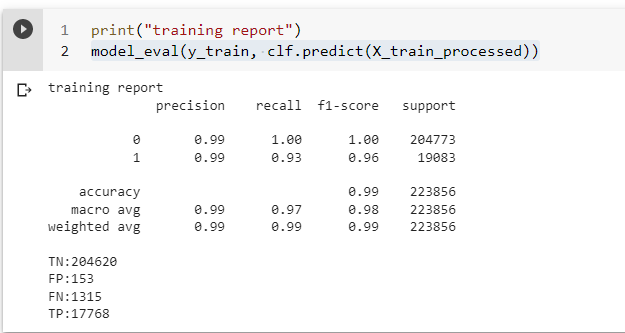

In [ ]:
print("test report")
model_eval(y_test, y_pred)

test report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87649
           1       0.53      0.08      0.13      8290

    accuracy                           0.91     95939
   macro avg       0.72      0.53      0.54     95939
weighted avg       0.89      0.91      0.88     95939

TN:87081
FP:568
FN:7659
TP:631


base model testdata\
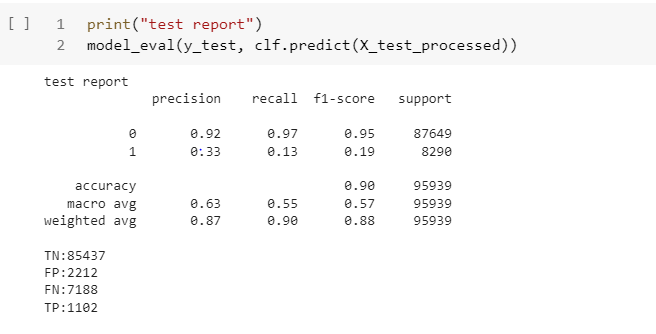